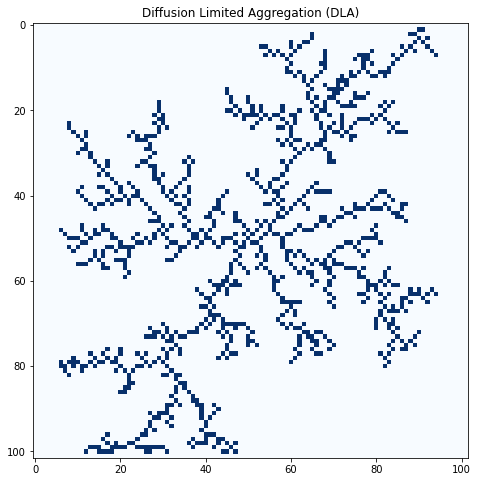

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set the size of the grid
grid_size = 101
center = grid_size // 2

# Create a grid with a center point
grid = np.zeros((grid_size+1, grid_size+1), dtype=int)
grid[center, center] = 1

def is_adjacent_to_cluster(x, y, grid):
    """Check if the point is adjacent to the cluster."""
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            if grid[x + dx, y + dy] == 1:
                return True
    return False

def random_walk(grid):
    """Perform a random walk until the particle sticks to the cluster."""
    x, y = random.choice([(0, random.randint(0, grid_size-1)), 
                          (grid_size-1, random.randint(0, grid_size-1)),
                          (random.randint(0, grid_size-1), 0),
                          (random.randint(0, grid_size-1), grid_size-1)])
    
    while True:
        # Randomly move the particle
        x += random.choice([-1, 0, 1])
        y += random.choice([-1, 0, 1])

        # Keep the particle within the bounds of the grid
        x = max(0, min(grid_size-1, x))
        y = max(0, min(grid_size-1, y))

        # Check if the particle is adjacent to the cluster
        if is_adjacent_to_cluster(x, y, grid):
            grid[x, y] = 1
            break

# Number of particles
n_particles = 1000

# Run the random walk for each particle
for _ in range(n_particles):
    random_walk(grid)

# Plotting the final grid
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='Blues')
plt.title("Diffusion Limited Aggregation (DLA)")
plt.show()